<a href="https://colab.research.google.com/github/ellaclauz/Hybrid/blob/main/Hybrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
!ls

gdrive	sample_data


In [24]:
hybrid_path = "/content/gdrive/MyDrive/Data/hybrid.csv"

In [25]:
hybrid_path


'/content/gdrive/MyDrive/Data/hybrid.csv'

In [26]:
hybrid = pd.read_csv(hybrid_path)

In [27]:
hybrid

,vehicle,year,msrp,acceleration,mpg,class
0,Prius (1st Gen),1997,24509.74,7.46,41.26,Compact
1,Tino,2000,35354.97,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26832.25,7.97,45.23,Compact
3,Insight,2000,18936.41,9.52,53.00,Two Seater
4,Civic (1st Gen),2001,25833.38,7.04,47.04,Compact
...,...,...,...,...,...,...
148,S400,2013,92350.00,13.89,21.00,Large
149,Prius Plug-in,2013,32000.00,9.17,50.00,Midsize
150,C-Max Energi Plug-in,2013,32950.00,11.76,43.00,Midsize
151,Fusion Energi Plug-in,2013,38700.00,11.76,43.00,Midsize


In [29]:
hybrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vehicle       153 non-null    object 
 1   year          153 non-null    int64  
 2   msrp          153 non-null    float64
 3   acceleration  153 non-null    float64
 4   mpg           153 non-null    float64
 5   class         153 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 7.3+ KB


# Lets create a scatter plot of msrp versus acceleration. That means msrp will be plotted on the vertical axis and acceleration on the horizontal axis.


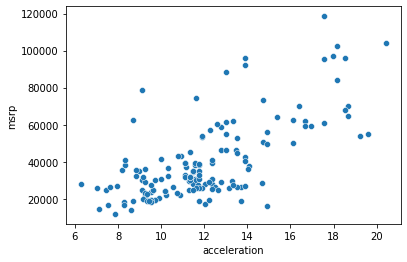

In [30]:
sn.scatterplot(data=hybrid, x= 'acceleration', y= 'msrp')
plt.show()

From this scatter plot we can see that there is a positive association between price and acceleration. The plot is sloping upwards, indicating that cars with greater acceleration tended to cost more on average. Conversely, the cars that cost more tend to have greater acceleration on average.

Next, lets create a scatter plot of the Msrp versus mileage (mpg)

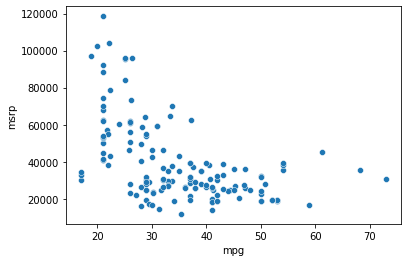

In [31]:
sn.scatterplot(data=hybrid, x= 'mpg', y= 'msrp')
plt.show()

This scatter plot shows a negative association between price and mileage. Hybrid cars with higher mileage tend to cost less on average. This seems surprising till you consider that cars that accelerate fast tend to be less fuel efficient and have lower mileage. As previous scatter plot showed those were also the cars that tended to cost more.
Along with the negative association, the scatter diagram of price versus efficiency shows a non-linear relation between the two variables. The points appears to be clustered around a curve, and not around a straight line.

Lets create a scatter plot of MSRP versus mileage(MPG) for the SUV class

In [32]:
SUV = hybrid[hybrid['class'] == 'SUV']
SUV.head()

,vehicle,year,msrp,acceleration,mpg,class
10,Escape,2004,36676.10,10.32,31.99,SUV
14,Lexus RX400h,2005,58521.14,12.76,28.23,SUV
16,Highlander,2005,29186.21,12.76,29.40,SUV
19,Escape 2WD,2005,19322.56,9.52,29.00,SUV
22,Mercury Mariner,2006,34772.40,8.98,32.93,SUV


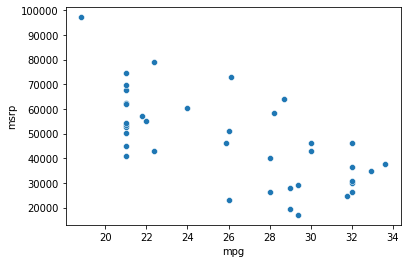

In [33]:
sn.scatterplot(data=SUV, x= 'mpg', y= 'msrp')
plt.show()

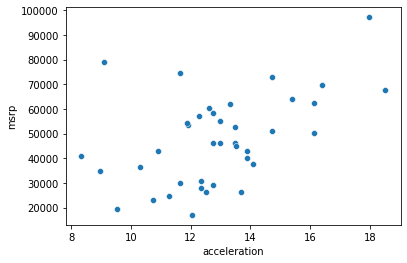

In [34]:
sn.scatterplot(data=SUV, x= 'acceleration', y= 'msrp')
plt.show()

If we restrict the data to just SUV class, the association between price and mileage is still negative but the relation appears to be more linear. The relation between price and acceleration of SUV's also shows a linear trend but with a positive slope.

We could plot all the variables in standard deviation and the plots would look the same. This gives us a way to compare the linearity in two scatter diagrams.

In [35]:
#Let's define a function named standard_units to convert an array of numbers to standard units.
def standard_units(any_numbers):
    "convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)

We can use this function to re-draw the two scatter diagrams for SUVs, with all the variables measured in standard units.

In [36]:
SUV_standard_units = pd.DataFrame(data = {'mpg (standard units)': standard_units(SUV['mpg']), 
                                          'msrp (standard units)': standard_units(SUV['msrp']),
                                          'acceleration (standard units)': standard_units(SUV['acceleration'])}) 
SUV_standard_units                                        

,mpg (standard units),msrp (standard units),acceleration (standard units)
10,1.317836,-0.608840,-1.161574
14,0.489550,0.605991,-0.071804
16,0.747288,-1.025362,-0.071804
19,0.659172,-1.573892,-1.518876
22,1.524908,-0.714707,-1.760054
27,-0.805749,-0.261367,-0.898064
28,-0.030332,-0.077564,-0.071804
30,1.264967,-1.267960,-0.732812
31,-0.931314,0.526671,-0.286185
33,-0.001695,-1.372815,-0.969524


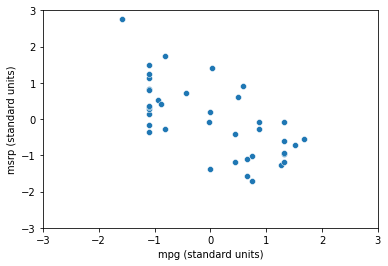

In [37]:
sn.scatterplot(data=SUV_standard_units, x='mpg (standard units)', y='msrp (standard units)')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

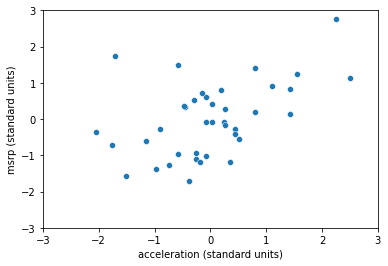

In [38]:
sn.scatterplot(data=SUV_standard_units, x='acceleration (standard units)', y='msrp (standard units)')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

The associations that we see in these figures are the same as those we saw before. Also, because the two scatter plots are now drawn on exactly the same scale, we can see that the linear relation in the second diagram is a little more fuzzy than in the first.

Next, we will define a measure that uses standard units to quantify the kinds of association that we have seen.

## The correlation coefficient

The *correlation coefficient* measures the strength of the linear relationship between two variables. Graphically, it measures how clustered the scatter plot is around a straight line.

The term *correlation coefficient* isn't easy to say, so it is usually shortened to *correlation* and denoted by $r$.

Here are some mathematical facts about $r$ that we will just observe by simulation.

- The correlation coefficient $r$ is a number between $-1$ and 1.
- $r$ measures the extent to which the scatter plot clusters around a straight line.
- $r = 1$ if the scatter plot is a perfect straight line sloping upwards, and $r = -1$ if the scatter plot is a perfect straight line sloping downwards.

In [39]:
def r_scatter(r):
    plt.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.scatter(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

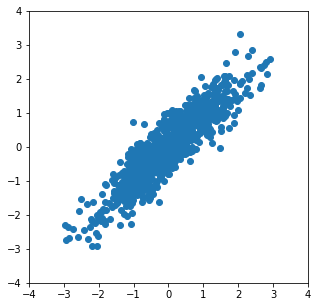

In [40]:
r_scatter(0.9)

In [41]:
#The correlation function

def correlation(t, x, y):
    return np.mean(standard_units(t[x])*standard_units(t[y]))

In [42]:
correlation(SUV, 'mpg', 'msrp')

-0.6667143635709919

In [43]:
correlation(SUV, 'acceleration', 'msrp')

0.48699799279959155

These values confirm what we had observed: 

- There is a negative association between price and efficiency, whereas the association between price and acceleration is positive.
- The linear relation between price and acceleration is a little weaker (correlation about 0.5) than between price and mileage (correlation about -0.67). 